# QS2 Rotation-Vibration Spectrum of CO

## Importing data
Download your data from Moodle and import it as well as the necessary libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.optimize as opt 
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import data
data = pd.read_csv('CO.CSV')

Check your data has imported correctly:

In [3]:
data

,wav,int
0,399.9761,1.885617
1,400.0363,1.849771
2,400.0966,1.807714
3,400.1569,1.764329
4,400.2171,1.725723
...,...,...
59733,3999.7610,0.064732
59734,3999.8210,0.064738
59735,3999.8810,0.064728
59736,3999.9420,0.064703


Plot the experimental spectrum. Concentrate on the structure in the 2150 cm$^{−1}$ region of the spectrum (zoom in using `xmin` and `xmax`).

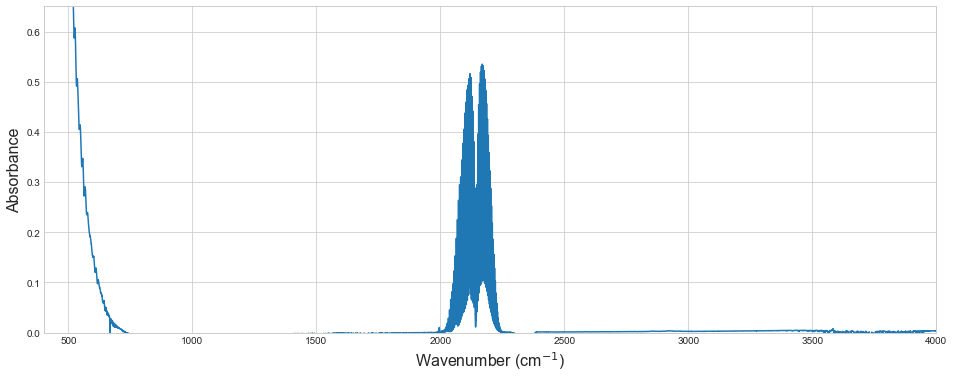

In [4]:
# Plot data
xdata = data['wav']
ydata = data['int']-0.061

xmin = 4000 #UPDATE
xmax = 400  #UPDATE

fig = plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
#plt.title("TITLE", size=16)
plt.xlim(xmax,xmin)
plt.ylim(0,0.65)
plt.show()

## Pick the Peaks

Use the code below to pick the peak positions by adjusting the **`prominence`** and **`distance`** parameters within the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. Make sure that as many peaks have been picked as possible. Extra peaks or false peaks do not matter at this stage.

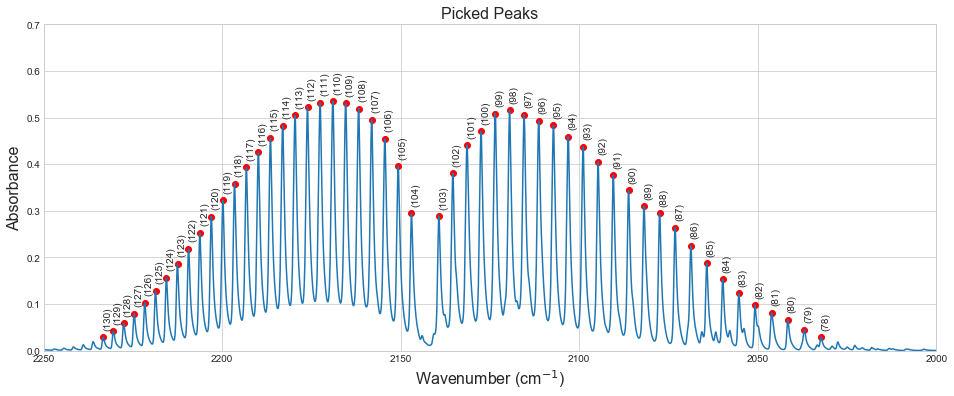

In [5]:
peaks = sg.find_peaks(ydata, prominence=0.02, distance=1) # Adjust the parameters

fig = plt.figure(figsize=(16,6))
plt.plot(xdata[peaks[0]],ydata[peaks[0]],"ro")
plt.plot(xdata,ydata)
xmin = 2000
xmax = 2250
ymin = 0.0
ymax = 0.7
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

# Labelling the picked peaks
for i in range(len(peaks[0])):
    if xdata[peaks[0][i]] > xmin and xdata[peaks[0][i]] < xmax:
        stri = '({})'.format(i)
        plt.text(xdata[peaks[0][i]],ydata[peaks[0][i]]+0.02,stri,rotation=90)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Picked Peaks", size=16)
plt.show()

## Assign R branch
To aid your analysis, the first line in the R-branch should be located near 2147 cm$^{−1}$. *Ensure the peaks are numbered from the middle **outwards**.*

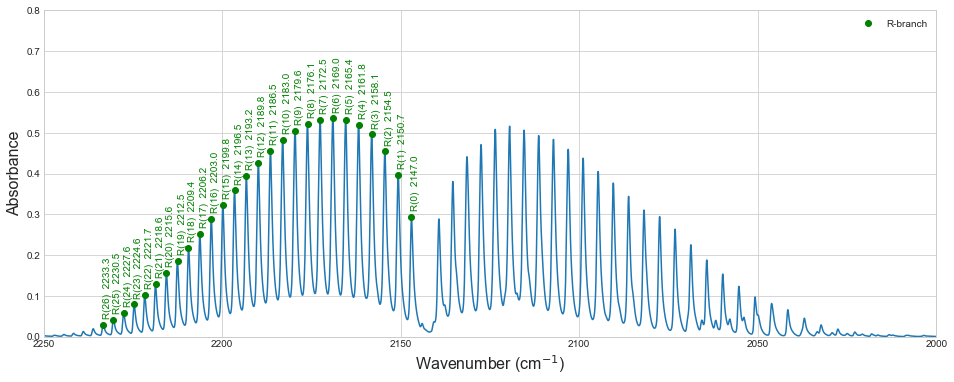

In [6]:
######### Choose the indices of the peaks associated with the R-branch. R(0) is at 2147 cm-1
R = list(range(104,131))            # Complete the list of indices AND label from the middle outwards
offsetR = 0        # Update the offset to assign the lower quantum number, J"
#########

### Creating the figure
fig= plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.8
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

### Empty arrays where the assigned wavenumber and quantum number will be stored
R_x = np.array([],dtype=np.float64)
R_y = np.array([],dtype=np.float64)
JR = np.array([],dtype=np.int64)

### Assigning and labelling peaks
for i in range(len(R)):
    R_x = np.append(R_x,xdata[peaks[0][R[i]]])
    R_y = np.append(R_y,ydata[peaks[0][R[i]]])
    JR = np.append(JR,i + offsetR) 
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+.02,stri,rotation=90,color='g')

### Plot
plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

## Assign P branch
Repeat for the P branch. *Ensure the peaks are numbered from the middle **outwards**.*

In [7]:
P = list(range(78,104))
P.reverse()

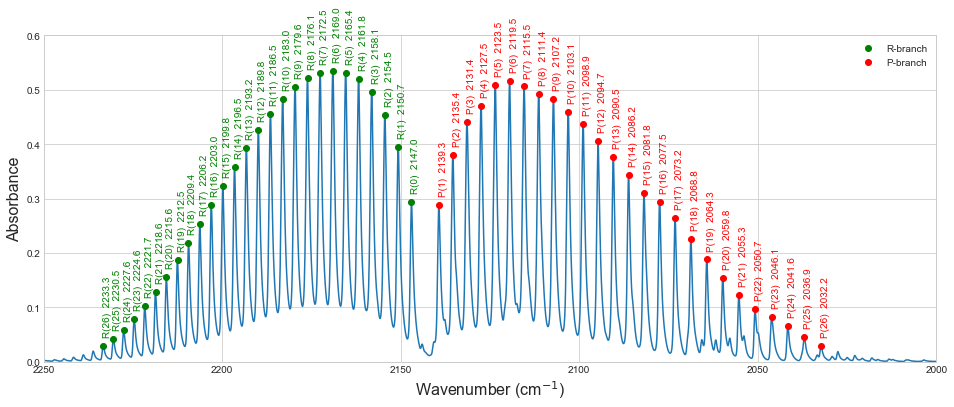

In [8]:
######### Choose the indices of the peaks associated with the P-branch.
#P =          # Complete the list of indices AND label from the middle outwards
offsetP = 1      # Update the offset to assign the lower quantum number, J"
#########

fig= plt.figure(figsize=(16,6))
plt.plot(xdata,ydata)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.6
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

P_x = np.array([],dtype=np.float64)
P_y = np.array([],dtype=np.float64)
JP = np.array([],dtype=np.int64)

for i in range(len(P)):
    P_x = np.append(P_x,xdata[peaks[0][P[i]]])
    P_y = np.append(P_y,ydata[peaks[0][P[i]]])
    JP = np.append(JP,i + offsetP) 
    stri = 'P({})  {:.5}'.format(JP[i],P_x[i])
    plt.text(P_x[i],P_y[i]+0.02,stri,rotation=90,color='r')

for i in range(len(R)):
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+0.02,stri,rotation=90,color='g')


plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.plot(P_x,P_y,'ro',label= 'P-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

Store the picked wavenumbers (cm$^{-1}$) in the array `energy` using the code below. Create a new quantum number $x$, which will allow both sets of data to be plotted together on the same curve. Is it smooth?

In [9]:
### Empty arrays
energy = np.array([],dtype=np.float64)
x = np.array([],dtype=np.int64)

### Assigning quantum number x to plot together on same curve
for i in range(len(JR)):
    x = np.append(x,JR[i]+1)     # J" + 1, see Equation 12
    energy = np.append(energy,R_x[i])

for i in range(len(JP)):
    x = np.append(x,-JP[i])      # = -J", see Equation 12
    energy = np.append(energy,P_x[i])

*Note: The branch positions have switched, so P is bottom left and R is top right (in line with increasing energy).*

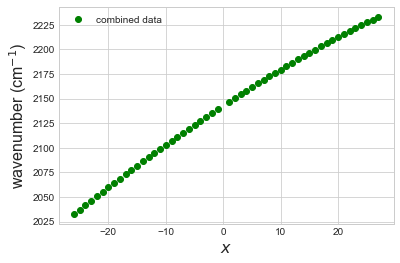

In [10]:
plt.plot(x,energy,'go',label='combined data')
plt.xlabel('$x$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

Fit the wavenumbers and energy to determine $\omega$, $B_1$ and $B_0$, then $B_e$:

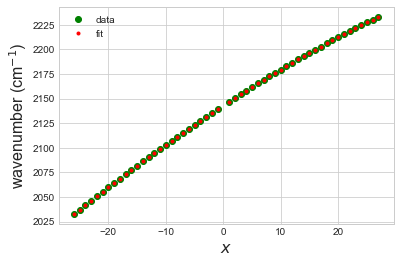

In [11]:
### Fit a function:
### ----------------
### Note: To use the extra terms in the fit you will need to 
### add 'd' and 'e' as a parameter when defining the function

def func(x,a,b,c,d):
    return a*x**2 + b*x + c + d*x**3 

optP, pcov = opt.curve_fit(func,x, energy)

plt.plot(x,energy,'go',label='data')
plt.plot(x,func(x,*optP),'r.',label='fit')

plt.xlabel('$x$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

In [12]:
B0 = (optP[1]-optP[0])/2
B1 = (optP[1]+optP[0])/2
w = optP[2]

Be = B0 - 0.5*(B1-B0)

print('B1 = ',B1,' cm-1')
print('B0 = ',B0,' cm-1')
print('Be = ',Be,' cm-1')
print('w = ',w,' cm-1')

B1 =  1.9047102905748625  cm-1
B0 =  1.9220772267498547  cm-1
Be =  1.9307606948373508  cm-1
w =  2143.0975693085115  cm-1


In [13]:
err_a = 2*pcov[0][0]**0.5
err_b = 2*pcov[1][1]**0.5

err_B0 = (err_a**2+err_b**2)**0.5

err_Be = (err_B0**2+(0.5*err_a)**2)**0.5

print('Be = ',Be,'+/-',err_Be,' cm-1')

Be =  1.9307606948373508 +/- 0.0013034588777751054  cm-1


The literature value is $B_e$ = 1.93128087 cm$^{-1}$. Estimate errors in your numbers, if out... try adding a cubic term to the fit! This will account for higher order terms not present in the rigid rotor model, such as centrifugal distortion.

Now calculate $r_e$ and $\alpha_e$, referring to equations in the Introduction:

In [15]:
from scipy import constants

$$ B_v = \frac{h}{8 c \pi^2 \mu r_v^2} $$

Rearrange for $r_v$:

$$ r_v = \sqrt{\frac{h}{8 c \pi^2 \mu B_v}} $$

In [16]:
h = constants.h
c = constants.c*100       # cm s-1
u = 6.85620864*1.6605e-27 # Dalton to kg

In [17]:
def rv(Bv):
    rv = np.sqrt(h/(8*c*np.pi**2*u*Bv))
    return rv

In [18]:
re = (rv(B0)+rv(B1))/2
print('r_e = ', str.format('{:.4g}', re*1e10), 'angstrom.')

r_e =  1.134 angstrom.


$$ B_v = B_e − α_e(v + 0.5) $$

In [19]:
def alpha_e(Bv, v):
    alpha_e = (Be - Bv)/(v+0.5)
    return alpha_e

In [20]:
alpha_e(B0, 0)

0.017366936174992187

In [21]:
ae = (alpha_e(B0, 0) + alpha_e(B1, 1))/2
print('alpha_e = ', str.format('{:.4g}', ae))

alpha_e =  0.01737


Finally, calculate the expected frequency of a pure rotational 1-0 emission. Research how this frequency is used in astronomy - why is it important?

In [22]:
c = 2.99792458e10 #speed of light in cm
emission = 2*B0*c
print('emission is expected at ',emission,'+/-',2*err_B0*c,'Hz')
print('emission is expected at ',emission/1e9,'+/-',2*err_B0*c/1e9,'GHz')

emission is expected at  115244851254.63246 +/- 78145095.01014085 Hz
emission is expected at  115.24485125463247 +/- 0.07814509501014084 GHz


## Intensities and Temperature
The intensity of the R-branch can be crudely modelled by weighting the degeneracy of the $J$-level, $2J+1$, and a Boltzmann term, $\exp(-E(J)/k_BT)$, where $E(J)=B_0J(J+1)$. In the code below, adjust $k_BT$ in cm$^{-1}$ to match the maximum $J$ of your experimental data. Convert $k_BT$ to Kelvin. Is it reasonable?

Temperature is  86.69623796324655 K


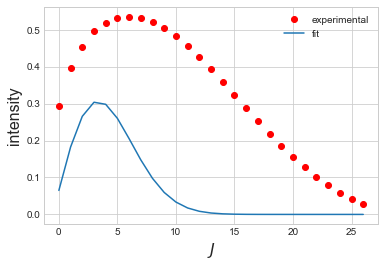

In [26]:
kT=57

factor=0.065

plt.xlabel('$J$',size=16)
plt.ylabel('intensity',size=16)
plt.plot(JR,R_y,"ro", label='experimental')
plt.plot(JR,factor*(2*JR+1)*np.exp(-B0*JR*(JR+1)/kT), label='fit')
plt.legend()

Kelvincm = 2.9979e10*6.626e-34/1.306e-23 # c*h/k_B

print('Temperature is ',kT*Kelvincm, 'K')

What is the temperature of interstellar CO if its absorption peaks at $J'' = 3$?